In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [167]:
gradboost_init_350Gm = sigbg_model(GradientBoostingClassifier(max_depth=5,
                                                             n_estimators=15,
                                                             learning_rate=1,
                                                             verbose=1), 
                                   init_350Gm_train, init_350Gm_test);
gradboost_init_350Gm.fit()
gradboost_init_350Gm.accuracy()

      Iter       Train Loss   Remaining Time 
         1           0.7722            1.98m
         2           0.6870            1.98m
         3           0.6529            1.86m
         4           0.6389            1.73m
         5           0.6321            1.54m
         6           0.6247            1.38m
         7           0.6181            1.22m
         8           0.6153            1.07m
         9           0.6123           55.17s
        10           0.6081           46.06s
Accuracy: 49.91%


In [169]:
gradboost_init_350Gm.model.predict(init_350Gm_test[:10,:-1])

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [119]:
gradboost_f350Gm = sigbg_model(GradientBoostingClassifier(max_depth=5,
                                                         n_estimators=15,
                                                         learning_rate=1,
                                                         verbose=1), 
                               f350Gm_data_train, f350Gm_data_test);
gradboost_f350Gm.fit()
gradboost_f350Gm.accuracy()

      Iter       Train Loss   Remaining Time 
         1           0.1656            9.27m
         2           0.1422            8.38m
         3           0.1353            7.59m
         4           0.1303            7.05m
         5           0.1275            6.42m
         6           0.1260            5.72m
         7           0.1243            5.07m
         8           0.1226            4.42m
         9           0.1215            3.79m
        10           0.1203            3.13m
Accuracy: 84.41%


In [120]:
gradboost_f2Tm = sigbg_model(GradientBoostingClassifier(max_depth=5,
                                                       n_estimators=15,
                                                       learning_rate=1,
                                                       verbose=1), 
                               f2Tm_data_train, f2Tm_data_test);
gradboost_f2Tm.fit()
gradboost_f2Tm.accuracy()

      Iter       Train Loss   Remaining Time 
         1           0.0082            8.85m
         2           0.0075            8.01m
         3           0.0072            7.54m
         4           0.0069            6.89m
         5           0.0065            6.22m
         6           0.0063            5.65m
         7           0.0062            5.05m
         8           0.0061            4.40m
         9           0.0060            3.73m
        10           0.0060            3.08m
Accuracy: 99.33%


# ROC RELATED

In [179]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/Users/elijahsheridan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [174]:
fpr, tpr, _ = roc_curve(gradboost_init_350Gm.model.predict(init_350Gm_test[:,:-1]), init_350Gm_test[:,-1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

NameError: name 'RocCurveDisplay' is not defined

# Grid Search Results

In [122]:
n_estimators = [5, 10, 15]
max_depth = [2, 5]

model_array = [
    [sigbg_model(GradientBoostingClassifier(max_depth=m, n_estimators=n, learning_rate=1, verbose=1), 
                 f350Gm_data_train, f350Gm_data_test) for m in max_depth] for n in n_estimators]

for n, row in zip(n_estimators, model_array):
    for m, model in zip(max_depth, row):
        print('Commencing fitting: n_estimators = {}, max_depth = {}'.format(n, m))
        model.fit_eval()

Commencing fitting: n_estimators = 5, max_depth = 2
      Iter       Train Loss   Remaining Time 
         1           0.1903           40.32s
         2           0.1784           30.62s
         3           0.1729           20.56s
         4           0.1675           10.35s
         5           0.1609            0.00s
Accuracy: 76.52%
Commencing fitting: n_estimators = 5, max_depth = 5
      Iter       Train Loss   Remaining Time 
         1           0.1656            2.54m
         2           0.1422            1.91m
         3           0.1353            1.27m
         4           0.1303           38.62s
         5           0.1275            0.00s
Accuracy: 82.49%
Commencing fitting: n_estimators = 10, max_depth = 2
      Iter       Train Loss   Remaining Time 
         1           0.1903            1.35m
         2           0.1784            1.26m
         3           0.1729            1.13m
         4           0.1675           59.18s
         5           0.1609           51.

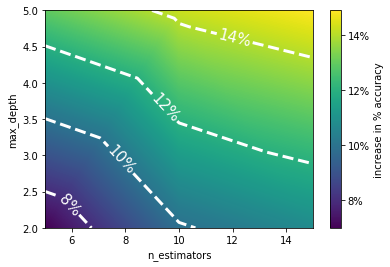

In [135]:
accuracy = [[76.52, 82.49],
            [79.41, 83.78],
            [80.31, 84.41]];
accuracy = np.array(accuracy);
interp2D(n_estimators, max_depth, (accuracy - 69.52)/100, 'n_estimators', 'max_depth', 'increase in % accuracy',
        [0.08, 0.10, 0.12, 0.14], ['8%', '10%', '12%', '14%'], manual=[(6, 2.35), (8, 3), (9, 3.5), (12, 4.5)]);
colorbar = plt.gca().images[-1].colorbar
colorbar.set_ticks([0.08, 0.10, 0.12, 0.14]);
colorbar.ax.set_yticklabels(['8%', '10%', '12%', '14%']);

# positive predictive value
# sensitivity, specificity, ^
# scikit learn functions, confusion matrix
# area under the curve, looking at ROC curve
# contextualize false positive vs false negative, which is worse
# making a relevant, appropriate metric
# filezilla 

# look locally to see memory I'm taking
# memory - start with ~8 GB
# cores = 4, 8, 20 (do later)

# pitching questions during demos

# Legacy

In [120]:
# depth = 2, n = 10
gradient_boost = sigbg_gradientboost_reg(train, test)

      Iter       Train Loss   Remaining Time 
         1           0.1432           40.75s
         2           0.1347           36.46s
         3           0.1280           31.62s
         4           0.1231           27.20s
         5           0.1195           22.80s
         6           0.1158           18.34s
         7           0.1144           13.72s
         8           0.1137            9.15s
         9           0.1118            4.57s
        10           0.1108            0.00s
Accuracy: 85.72%


In [123]:
# depth = 5, n = 15
gradient_boost2 = sigbg_gradientboost_reg(train, test)

      Iter       Train Loss   Remaining Time 
         1           0.1109            2.71m
         2           0.1056            2.51m
         3           0.1044            2.31m
         4           0.1029            2.11m
         5           0.1011            1.90m
         6           0.0999            1.72m
         7           0.0993            1.52m
         8           0.0991            1.33m
         9           0.0987            1.14m
        10           0.0982           57.20s
Accuracy: 87.17%


In [18]:
# depth = 5, n = 15
grad_boost_full_350Gm_more = sigbg_gradientboost_reg(train_f350Gm, test_f350Gm)

      Iter       Train Loss   Remaining Time 
         1           0.1658            8.75m
         2           0.1428            8.10m
         3           0.1361            7.51m
         4           0.1311            6.88m
         5           0.1268            6.12m
         6           0.1241            5.51m
         7           0.1228            4.85m
         8           0.1210            4.26m
         9           0.1197            3.61m
        10           0.1188            2.99m


KeyboardInterrupt: 

In [20]:
learning_rates = [0.1, 1]
max_depths = [3, 5, 7]
max_features = [0.25, 0.5, 1.0]

gradboost_model_array_new = [
    [[sigbg_model(GradientBoostingClassifier(
        learning_rate=l, 
        max_depth=maxd,
        max_features=maxf), f350Gm_data_train, f350Gm_data_test) 
      for maxf in max_features] 
     for maxd in max_depths] 
    for l in learning_rates]

for l, grid in zip(learning_rates, gradboost_model_array_new):
    for maxd, row in zip(max_depths, grid):
        for maxf, model in zip(max_features, row):
            print('Commencing fitting: learning_rate = {}, max_depth = {}, max_features = {}'.format(l, maxd, maxf))
            model.fit()
            print(model.metrica())
            print(model.metricb())

Commencing fitting: learning_rate = 0.1, max_depth = 3, max_features = 0.25
2.2636504754880566
0.8538510139279996
Commencing fitting: learning_rate = 0.1, max_depth = 3, max_features = 0.5
2.3733266503608337
0.8633274833076632
Commencing fitting: learning_rate = 0.1, max_depth = 3, max_features = 1.0
2.434044253618128
0.8683526723839592
Commencing fitting: learning_rate = 0.1, max_depth = 5, max_features = 0.25
2.558085889645502
0.8785211409871081
Commencing fitting: learning_rate = 0.1, max_depth = 5, max_features = 0.5
2.6295029405356662
0.8835412617927487
Commencing fitting: learning_rate = 0.1, max_depth = 5, max_features = 1.0
2.674529882379914
0.8865533342761331
Commencing fitting: learning_rate = 0.1, max_depth = 7, max_features = 0.25
2.7274703187427436
0.8906760482563938
Commencing fitting: learning_rate = 0.1, max_depth = 7, max_features = 0.5
2.844496724582684
0.8976971432313878
Commencing fitting: learning_rate = 0.1, max_depth = 7, max_features = 1.0
2.932214688375223
0.90

In [24]:
bg_cs = 0.106e-12 + 0.0117e-12 + 5.58e-12
sig_cs = 0.009998e-12
lumi = 120e15

print('lumi = {}'.format(lumi))
for l, grid in zip(learning_rates, gradboost_model_array_new):
    for maxd, row in zip(max_depths, grid):
        for maxf, model in zip(max_features, row):
            sig = (model.tpr() * sig_cs * lumi) / np.sqrt(model.tpr() * sig_cs * lumi + model.fpr() * bg_cs * lumi)
            print('Metric for learning_rate = {}, max_depth = {}, max_features = {}: {}'.format(l, maxd, maxf, sig))

lumi = 3000e15            
print('lumi = {}'.format(lumi))
for l, grid in zip(learning_rates, gradboost_model_array_new):
    for maxd, row in zip(max_depths, grid):
        for maxf, model in zip(max_features, row):
            sig = (model.tpr() * sig_cs * lumi) / np.sqrt(model.tpr() * sig_cs * lumi + model.fpr() * bg_cs * lumi)
            print('Metric for learning_rate = {}, max_depth = {}, max_features = {}: {}'.format(l, maxd, maxf, sig))

lumi = 1.2e+17
Metric for learning_rate = 0.1, max_depth = 3, max_features = 0.25: 3.2672198909137147
Metric for learning_rate = 0.1, max_depth = 3, max_features = 0.5: 3.42394821494896
Metric for learning_rate = 0.1, max_depth = 3, max_features = 1.0: 3.5106311420631764
Metric for learning_rate = 0.1, max_depth = 5, max_features = 0.25: 3.687550562063622
Metric for learning_rate = 0.1, max_depth = 5, max_features = 0.5: 3.789258300960402
Metric for learning_rate = 0.1, max_depth = 5, max_features = 1.0: 3.853331739678027
Metric for learning_rate = 0.1, max_depth = 7, max_features = 0.25: 3.9286663317602044
Metric for learning_rate = 0.1, max_depth = 7, max_features = 0.5: 4.0948849783883166
Metric for learning_rate = 0.1, max_depth = 7, max_features = 1.0: 4.219255182858314
Metric for learning_rate = 1, max_depth = 3, max_features = 0.25: 3.695924536713254
Metric for learning_rate = 1, max_depth = 3, max_features = 0.5: 3.8403350992081045
Metric for learning_rate = 1, max_depth = 3, m

In [26]:
for l, grid in zip(learning_rates, gradboost_model_array_new):
    for maxd, row in zip(max_depths, grid):
        for maxf, model in zip(max_features, row):
            print('learning_rate = {}, max_depth = {}, max_features = {}'.format(l, maxd, maxf))
            print(model.tpr())
            print(model.fpr())

learning_rate = 0.1, max_depth = 3, max_features = 0.25
0.85
0.141
learning_rate = 0.1, max_depth = 3, max_features = 0.5
0.859
0.131
learning_rate = 0.1, max_depth = 3, max_features = 1.0
0.864
0.126
learning_rate = 0.1, max_depth = 5, max_features = 0.25
0.875
0.117
learning_rate = 0.1, max_depth = 5, max_features = 0.5
0.88
0.112
learning_rate = 0.1, max_depth = 5, max_features = 1.0
0.883
0.109
learning_rate = 0.1, max_depth = 7, max_features = 0.25
0.888
0.106
learning_rate = 0.1, max_depth = 7, max_features = 0.5
0.895
0.099
learning_rate = 0.1, max_depth = 7, max_features = 1.0
0.899
0.094
learning_rate = 1, max_depth = 3, max_features = 0.25
0.877
0.117
learning_rate = 1, max_depth = 3, max_features = 0.5
0.884
0.11
learning_rate = 1, max_depth = 3, max_features = 1.0
0.89
0.105
learning_rate = 1, max_depth = 5, max_features = 0.25
0.891
0.104
learning_rate = 1, max_depth = 5, max_features = 0.5
0.898
0.098
learning_rate = 1, max_depth = 5, max_features = 1.0
0.904
0.092
learni

In [27]:
bg_cs = 0.106e-12 + 0.0117e-12 + 5.58e-12
sig_cs = 0.009998e-12
lumi1 = 120e15
lumi2 = 3000e15

gradboost_f1Tm = sigbg_model(GradientBoostingClassifier(max_depth=7, learning_rate=1, verbose=1), 
                             f1Tm_data_train, f1Tm_data_test);
gradboost_f1Tm.fit()
print(gradboost_f1Tm.metrica())
print((gradboost_f1Tm.tpr() * sig_cs * lumi1) / np.sqrt(gradboost_f1Tm.tpr() * sig_cs * lumi1 + gradboost_f1Tm.fpr() * bg_cs * lumi1))
print((gradboost_f1Tm.tpr() * sig_cs * lumi2) / np.sqrt(gradboost_f1Tm.tpr() * sig_cs * lumi2 + gradboost_f1Tm.fpr() * bg_cs * lumi2))
# gradboost_f1Tm.save_model('gradboost_f1Tm')

gradboost_f1p5Tm = sigbg_model(GradientBoostingClassifier(max_depth=7, learning_rate=1, verbose=1), 
                               f1p5Tm_data_train, f1p5Tm_data_test);
gradboost_f1p5Tm.fit()
print(gradboost_f1p5Tm.metrica())
print((gradboost_f1p5Tm.tpr() * sig_cs * lumi1) / np.sqrt(gradboost_f1p5Tm.tpr() * sig_cs * lumi1 + gradboost_f1p5Tm.fpr() * bg_cs * lumi1))
print((gradboost_f1p5Tm.tpr() * sig_cs * lumi2) / np.sqrt(gradboost_f1p5Tm.tpr() * sig_cs * lumi2 + gradboost_f1p5Tm.fpr() * bg_cs * lumi2))
# gradboost_f1p5Tm.save_model('gradboost_f1p5Tm')

gradboost_f2Tm = sigbg_model(GradientBoostingClassifier(max_depth=7, learning_rate=1, verbose=1), 
                             f2Tm_data_train, f2Tm_data_test);
gradboost_f2Tm.fit()
print(gradboost_f2Tm.metrica())
print((gradboost_f2Tm.tpr() * sig_cs * lumi1) / np.sqrt(gradboost_f2Tm.tpr() * sig_cs * lumi1 + gradboost_f2Tm.fpr() * bg_cs * lumi1))
print((gradboost_f2Tm.tpr() * sig_cs * lumi2) / np.sqrt(gradboost_f2Tm.tpr() * sig_cs * lumi2 + gradboost_f2Tm.fpr() * bg_cs * lumi2))

      Iter       Train Loss   Remaining Time 
         1           0.4096          103.11m
         2           0.2464          101.72m
         3           0.1927          100.32m
         4           0.1662           99.31m
         5           0.1498           98.26m
         6           0.1399           96.76m
         7           0.1341           96.08m
         8           0.1303           95.37m
         9           0.1280           94.36m
        10           0.1236           93.30m
        20           0.0933           83.19m
        30           0.0842           73.03m
        40           0.0777           62.63m
        50           0.0713           52.29m
        60           0.0696           42.04m
        70           0.0720           31.51m
        80           0.1216           21.01m
        90           0.1203           10.50m
       100           0.1189            0.00s
9.429745007638907
12.715787575042523
63.57893787521262
      Iter       Train Loss   Remaining Time

In [28]:
bg_cs = 0.106e-12 + 0.0117e-12 + 5.58e-12
sig_cs = 0.009998e-12
lumi1 = 120e15
lumi2 = 3000e15

gradboost_f1Tm = sigbg_model(GradientBoostingClassifier(n_estimators=50, max_depth=7, learning_rate=1, verbose=1), 
                             f1Tm_data_train, f1Tm_data_test);
gradboost_f1Tm.fit()
print(gradboost_f1Tm.metrica())
print((gradboost_f1Tm.tpr() * sig_cs * lumi1) / np.sqrt(gradboost_f1Tm.tpr() * sig_cs * lumi1 + gradboost_f1Tm.fpr() * bg_cs * lumi1))
print((gradboost_f1Tm.tpr() * sig_cs * lumi2) / np.sqrt(gradboost_f1Tm.tpr() * sig_cs * lumi2 + gradboost_f1Tm.fpr() * bg_cs * lumi2))
# gradboost_f1Tm.save_model('gradboost_f1Tm')

gradboost_f1p5Tm = sigbg_model(GradientBoostingClassifier(n_estimators=50, max_depth=7, learning_rate=1, verbose=1), 
                               f1p5Tm_data_train, f1p5Tm_data_test);
gradboost_f1p5Tm.fit()
print(gradboost_f1p5Tm.metrica())
print((gradboost_f1p5Tm.tpr() * sig_cs * lumi1) / np.sqrt(gradboost_f1p5Tm.tpr() * sig_cs * lumi1 + gradboost_f1p5Tm.fpr() * bg_cs * lumi1))
print((gradboost_f1p5Tm.tpr() * sig_cs * lumi2) / np.sqrt(gradboost_f1p5Tm.tpr() * sig_cs * lumi2 + gradboost_f1p5Tm.fpr() * bg_cs * lumi2))
# gradboost_f1p5Tm.save_model('gradboost_f1p5Tm')

gradboost_f2Tm = sigbg_model(GradientBoostingClassifier(n_estimators=50, max_depth=7, learning_rate=1, verbose=1), 
                             f2Tm_data_train, f2Tm_data_test);
gradboost_f2Tm.fit()
print(gradboost_f2Tm.metrica())
print((gradboost_f2Tm.tpr() * sig_cs * lumi1) / np.sqrt(gradboost_f2Tm.tpr() * sig_cs * lumi1 + gradboost_f2Tm.fpr() * bg_cs * lumi1))
print((gradboost_f2Tm.tpr() * sig_cs * lumi2) / np.sqrt(gradboost_f2Tm.tpr() * sig_cs * lumi2 + gradboost_f2Tm.fpr() * bg_cs * lumi2))

      Iter       Train Loss   Remaining Time 
         1           0.4096           49.78m
         2           0.2464           48.92m
         3           0.1927           47.91m
         4           0.1662           46.93m
         5           0.1498           45.85m
         6           0.1399           44.85m
         7           0.1341           43.81m
         8           0.1303           42.78m
         9           0.1280           41.84m
        10           0.1236           40.83m
        20           0.0933           30.82m
        30           0.0842           20.61m
        40           0.0777           10.32m
        50           0.0713            0.00s
9.429745007638907
12.715787575042523
63.57893787521262
      Iter       Train Loss   Remaining Time 
         1           0.3122           50.30m
         2           0.1564           49.18m
         3           0.0993           48.22m
         4           0.0789           47.12m
         5           0.0687           46.11

In [29]:
models = [gradboost_f1Tm, gradboost_f1p5Tm, gradboost_f2Tm]
for model in models:
    print(model.tpr() / np.sqrt(model.fpr()))

9.429745007638907
12.832484820433908
15.732331359337689
